In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
from scripts import project_functions
import importlib as imp
from pylab import savefig
imp.reload(project_functions)
df = project_functions.load_and_process("../../data/raw/")
print(df)

           video_id trending_date  \
0       n1WpP7iowLc      17.14.11   
1       0dBIkQ4Mz1M      17.14.11   
2       5qpjK5DgCt4      17.14.11   
3       d380meD0W0M      17.14.11   
4       2Vv-BfVoq4g      17.14.11   
...             ...           ...   
375936  1PhPYr_9zRY      18.14.06   
375937  BZt0qjTWNhw      18.14.06   
375939  D6Oy4LfoqsU      18.14.06   
375940  oV0zkMe1K8s      18.14.06   
375941  ooyjaVdt-jA      18.14.06   

                                                    title  \
0              Eminem - Walk On Water (Audio) ft. Beyoncé   
1                           PLUSH - Bad Unboxing Fan Mail   
2       Racist Superman | Rudy Mancuso, King Bach & Le...   
3                                I Dare You: GOING BALD!?   
4             Ed Sheeran - Perfect (Official Music Video)   
...                                                   ...   
375936  BTS Plays With Puppies While Answering Fan Que...   
375937                       The Cat Who Caught the Laser   
375939

In [4]:
from pandas_profiling import ProfileReport
overview = ProfileReport(df)
print(overview.to_file(output_file='overview1.html'))


None


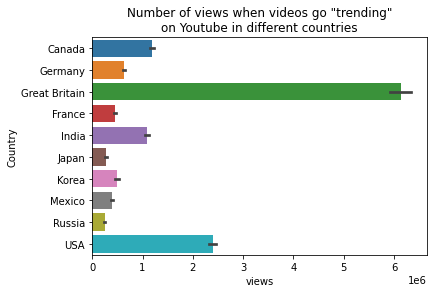

In [13]:
p1 = sns.barplot(y=df['Country'],x=df['views']).set_title("Number of views when videos go \"trending\"\non Youtube in different countries" )
#**Oh wow, Great Britain has so many views compared to the other ones". I wonder how the likes look like**

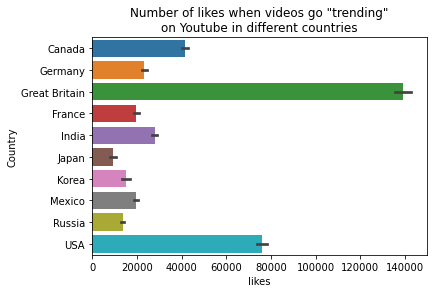

In [14]:
p2 = sns.barplot(y=df['Country'],x=df['likes']).set_title("Number of likes when videos go \"trending\"\non Youtube in different countries" )
##**Oh! a similar pattern. interesting. maybe likes are positively correlated to views**

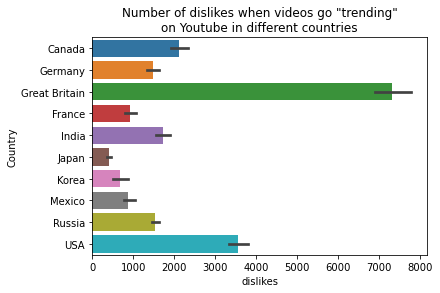

In [15]:
p3 = sns.barplot(y=df['Country'],x=df['dislikes']).set_title("Number of dislikes when videos go \"trending\"\non Youtube in different countries")
#**The dislikes have a similar pattern too**

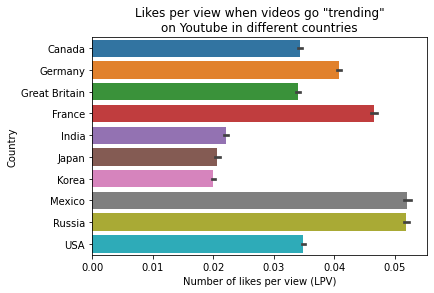

In [2]:
df['LPV']=df['likes']/df['views']
df['LPV'].fillna(0)
p4 = sns.barplot(y=df['Country'],x=df['LPV']).set_title("Likes per view when videos go \"trending\"\non Youtube in different countries" )
plot.xlabel("Number of likes per view (LPV)")
plot.savefig('../../images/LPVcs.png')

##**The number of likes / views now looks different. Great Britain Now isn't the largest. Mexico and Russia have the most likes per view.**

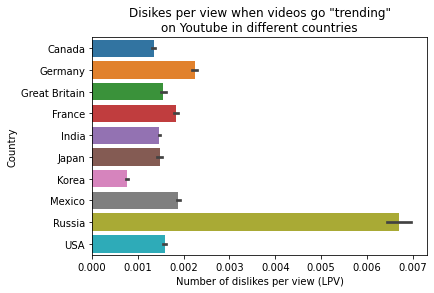

In [3]:
df['DLPV']=df['dislikes']/df['views']
df['DLPV'].fillna(0)
p5 = sns.barplot(y=df['Country'],x=df['DLPV']).set_title("Disikes per view when videos go \"trending\"\non Youtube in different countries" )
plot.xlabel("Number of dislikes per view (LPV)")
plot.savefig('../../images/dLPVcs.png')
##**Russia really stands out here with high dislikes per view compared to other countries**

here
here2
here3


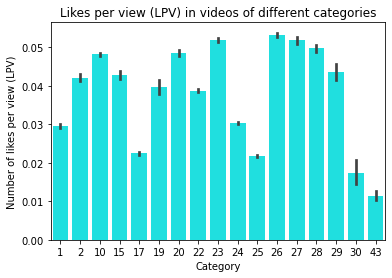

In [4]:
#p6 = sns.FacetGrid(df, row="category_id")
#p6.map_dataframe(sns.barplot, x=df['Country'],y=df['LPV'])
p6 = sns.barplot(x=df['category_id'],y=df['LPV'],color="cyan").set_title("Likes per view (LPV) in videos of different categories")
plot.ylabel("Number of likes per view (LPV)")
plot.xlabel("Category")
plot.savefig('../../images/LPVcats.png')
#**Likes per view vary across categories. 26 ("Howto and style"),23(Comedy), 27(Education) have the highest LPV, 17(Sports),25(News & politics), 43(Shows) have the lowest.**

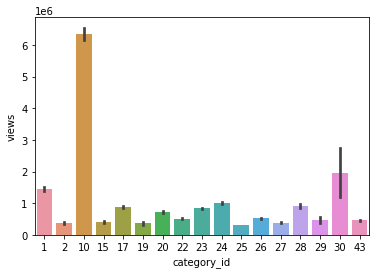

In [17]:
#p6 = sns.FacetGrid(df, row="category_id")
#p6.map_dataframe(sns.barplot, x=df['Country'],y=df['LPV'])
p7 = sns.barplot(x=df['category_id'],y=df['views'])
#**Category 10 (Music) has far more views than other categories! Category 30 (Movies) is the second largest, and has the widest variation. \n Autos & Vehicles become trending with so few views**

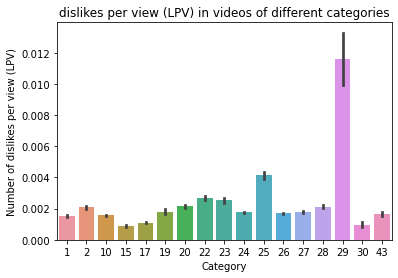

In [5]:
#p6 = sns.FacetGrid(df, row="category_id")
#p6.map_dataframe(sns.barplot, x=df['Country'],y=df['LPV'])
p8 = sns.barplot(x=df['category_id'],y=df['DLPV']).set_title("dislikes per view (LPV) in videos of different categories")
plot.ylabel("Number of dislikes per view (LPV)")
plot.xlabel("Category")
plot.savefig('../../images/dLPVcats.png')
#**Category 29 (Non-profits & Activism) gets the most dislikes per view**

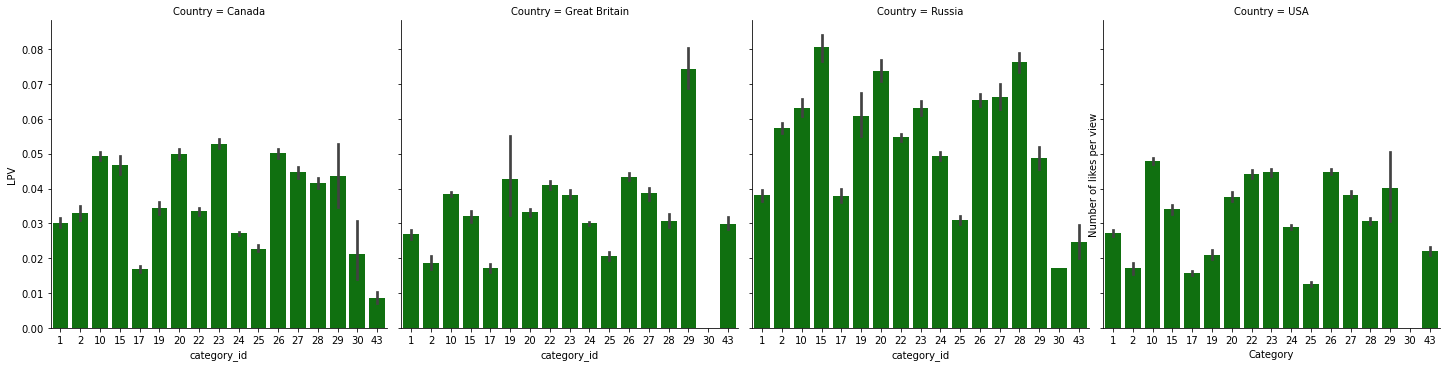

In [11]:
dfCUB = df.loc[(df['Country']=="Canada")| (df['Country']=="USA") | (df['Country']=="Great Britain") | (df['Country']=="Russia")]
#print(dfCUB)
P9 = sns.catplot(data=dfCUB,col='Country',x='category_id',y='LPV',kind='bar',color = 'green')
plot.xlabel("Category")
plot.ylabel("Number of likes per view")
plot.savefig("../../images/LPVcatscs.png")
#**In Canada, US, Great Britain,and Russia, the distribution of LPV per category differs**
#
#Canada has an evened out LPV distrivution, wih 43 (shows) being the lowest.
#Great britain has its highest on category 29 (Nonprofits and activism).
#Russia has lots of high LPVs. 
#US has lots of low LPVs

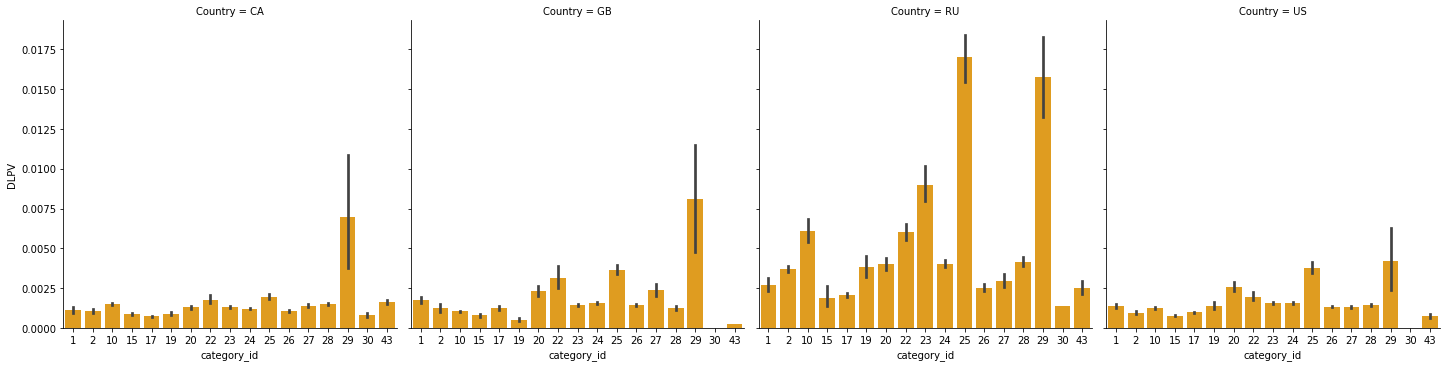

In [38]:
#dfCUB = df.loc[(df['Country']=="CA")| (df['Country']=="US") | (df['Country']=="GB") | (df['Country']=="RU")]
#print(dfCUB)

P10 = sns.catplot(data=dfCUB,col='Country',x='category_id',y='DLPV',kind='bar',color = 'orange')
#Here it's really interesting that for Cananada and GB, the DLPV stays relatively low for most categories and 29 stands out.
#Russia is distinctive because it has more DLPVs across more categories.
#The countries consistently have a high DLPV for category 29 (Activism and Nonprofits)

In [ ]:
dfEng = dfCUB.loc[(df['Country']=="Canada")| (df['Country']=="USA") | (df['Country']=="Great Britain")]
dfEng['Engagement']=(dfEng['likes']+dfEng['views']+dfEng['dislikes']+dfEng['comment_count'])/4
title_catchiness = []
for sentence in df['title'] :
    count = 0
    for char in sentence :
        if (char == '!') | (str.isupper(char)) :
            count = count+1
    title_catchiness.append(count)
    catchiness = pd.Series(title_catchiness)
dfEng['title_catchiness']=catchiness
print(dfEng)

<ipython-input-5-af05a65a5164>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfEng['Engagement']=(dfEng['likes']+dfEng['views']+dfEng['dislikes']+dfEng['comment_count'])/4
